# Exercise sheet 7
### Due 16/12/2022 14:00
Group 42:
- Sascha Barz
- Fabian Kampshoff
- Simon Pick

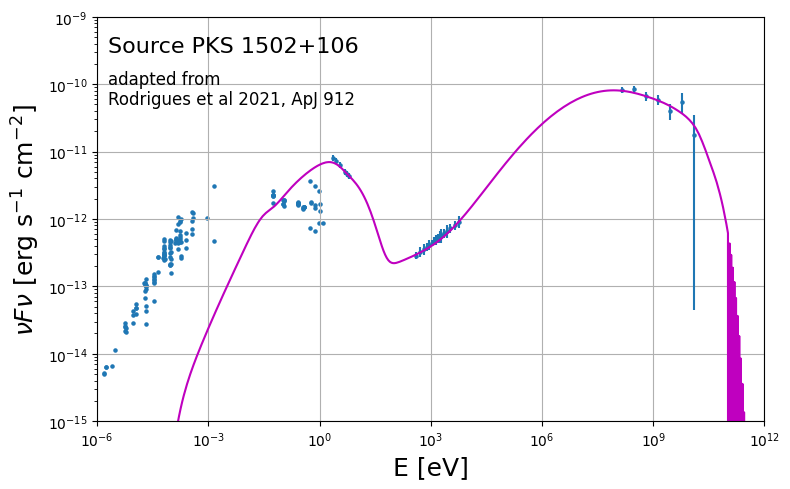

In [1]:
import numpy as np
from matplotlib import pyplot as plt
data = np.loadtxt("ex-07_data.dat")
pks_data_x, pks_data_y, pks_data_err = data[:,:180]
pks_model_x, pks_model_y = data[(0,1),630:]

fig = plt.figure(figsize=(8,5))

# Plot data
plt.scatter(pks_data_x, pks_data_y, s=5)
plt.errorbar(pks_data_x, pks_data_y, pks_data_err, ls='None')

# Plot model curve
plt.loglog(pks_model_x, pks_model_y, 'm-') 

# Esthetics
plt.grid()
plt.axis([1e-6,1e12,1e-15,1e-9])
plt.xlabel('E [eV]', fontsize=18)
plt.ylabel(r'$\nu F\nu$ [erg s$^{-1}$ cm$^{-2}$]', fontsize=18)
plt.rcParams['xtick.labelsize'] = 18 
plt.rcParams['ytick.labelsize'] = 18
plt.text(2e-6, 3e-10, "Source PKS 1502+106", 
         fontsize=16)
plt.text(2e-6, 5e-11, "adapted from\n\
Rodrigues et al 2021, ApJ 912", fontsize=12)
plt.tight_layout()
plt.show()

Consider the same data and model as last week, contained in the file `ex07_data.dat` and shown in the figure above:

`pks_data_x`: measured photon energies, $E_i$ in units of $\rm{eV}$

`pks_data_y`: for each energy $E_i$ in `data_x`, this array tells you the measured flux value $F_i$, in units of [erg/cm$^2$/s]

`pks_data_err`: uncertainties in the measured photon fluxes, $\sigma_i$ [erg/cm$^2$/s]

`pks_model_x`: photon energies of the magenta curve in units of $\rm{eV}$

`pks_model_y`: for each discrete value of energy $E$ in `model_x`, this array gives the predicted flux $F$, in units of $\rm{erg}/\rm{cm}^2/\rm{s}$.


# Problem

Write a function `calc_chi2` that calculates the reduced chi-squared value between a model and a data set:

$$
\chi^2 \,=\, \frac{1}{N}\,\sum_{i=0}^{N}\frac{(F_i-F^\rm{model}_i)^2}{\sigma_i^2},
$$

where $N$ is the number of points in your data set, and $F^\rm{model}_i$ is the flux value predicted by the model for energy $E_i$.

Then, use your function to get the $\chi^2$ value between the **model given by the magenta curve** and the **data measured at energies above 2 eV**.

In [68]:
def calc_chi2(modelx, modely, datax, datay, daterr, threshold):
    """
    Calculates the reduced chi-squared value between a model and a data set.
    
    Args:
        modelx: array of values for first axis of model
        modely: array of values for second axis of model
        datax: array of values for first axis of data set
        datay: array of values for second axis of data set
        daterr: array of uncertainties in the data
        threshold: integer that defines the lower bound for energies
    
    Returns:
        Reduced chi-squared value between the model and data set
    """
    flux_model = np.interp(datax[datax>threshold], modelx, modely)
    flux_data = datay[datax>threshold]
    errors = daterr[datax>threshold]
    differences = []
    chi_sum_terms = []
    for i in range(len(flux_data)):
        differences.append((flux_data[i]-flux_model[i])**2)
        chi_sum_terms.append(differences[i]/errors[i]**2) 
    return sum(chi_sum_terms)/len(flux_data)


chi2 = calc_chi2(pks_model_x, pks_model_y, pks_data_x, pks_data_y, pks_data_err, 2)                       
print(f"Reduced chi2: {chi2:.3f}")

Reduced chi2: 0.394


*Hint:* use `np.interp()` to obtain the flux values predicted by the model at the energies $E_i$ where the data is measured. Then create an array with the squared differences following the formula above, and finally sum over it.